In [1]:
import pandas as pd
import numpy as np
from math import sin, cos, pi, atan2, asin, sqrt
import matplotlib.pyplot as plt

In [2]:
SIFT1_datafile = "Full_NASA_S1"
SIFT2_datafile = "Full_NASA_S2"

# Parameters
dt = 0.001
dt_VN = 0.025
B = 6.5*10**-3   # temperature lapse rate in troposphere in K/m
R = 287   # ideal gas constant in J/(kg.K)
g = 9.80665  # gravity at sea level in m/s2
T0 = 288.15   # standard air temperature in K
P0 = 101.325   # standard air pressure in kPa
pi = 3.1415
ft = 3.2884  # ft/m

## SIFT 1 Truncation

In [3]:
################## DATA FRAME ##################
datafile = '../../' + SIFT1_datafile + '.csv'
fields = ['Timestamp', 'Pres', 'LinearAccelNed X', 'LinearAccelNed Y', 'LinearAccelNed Z', 'Roll', 'Pitch', 'Yaw']
df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata1 = all_time

start1 = 334_200
end1 = 345_200
tdata1 = tdata1[start1:end1]
tdata1 = tdata1 - tdata1[0]

ax_vn1 = df['LinearAccelNed X'].values[start1:end1]
ay_vn1 = df['LinearAccelNed Y'].values[start1:end1]
az_vn1 = df['LinearAccelNed Z'].values[start1:end1]

roll_vn1 = df['Roll'].values[start1:end1]
pitch_vn1 = df['Pitch'].values[start1:end1]
yaw_vn1 = df['Yaw'].values[start1:end1]

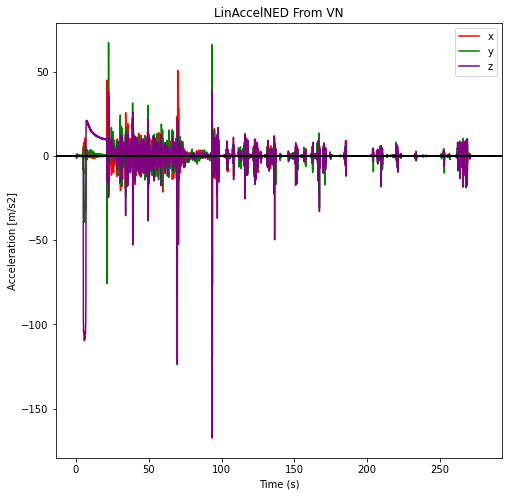

In [4]:
fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata1, ax_vn1, color='red', label='x')
l3 = ax.plot(tdata1, ay_vn1, color='green', label='y')
l4 = ax.plot(tdata1, az_vn1, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [m/s2]")
ax.legend()
plt.show()

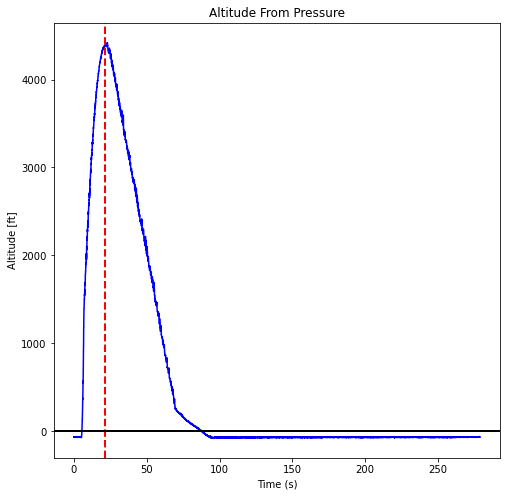

In [5]:
all_pres1 = df['Pres'].values[start1:end1]

def nasa_pres(P, P0=101.29, T0=288.08):
    T = T0*((P / P0)**(1 / 5.256)) - 273.1
    h = (T-15.04)/(-0.00649)
    return h

v_NASA_pres = np.vectorize(nasa_pres)
altitude_NASA_pres1 = v_NASA_pres(all_pres1, P0=99.035, T0=288.1)*ft #+ 70

fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l1 = ax.plot(tdata1, altitude_NASA_pres1, color='blue', label='Pressure Derived')
l5 = plt.axvline(x=21.5, color='red', linestyle='--', linewidth=2)
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Altitude From Pressure")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude [ft]")
#ax.legend()
plt.show()

In [6]:
trunc_df1 = pd.DataFrame(zip(tdata1, all_pres1, ax_vn1, ay_vn1, az_vn1, roll_vn1, pitch_vn1, yaw_vn1), columns=fields)
trunc_df1.to_csv("Trunc_NASA_S1.csv")

## SIFT 2 Truncation

In [7]:
################## DATA FRAME ##################
datafile = '../../' + SIFT2_datafile + '.csv'
df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata2 = all_time

start2 = 334_200
end2 = 345_200
tdata2 = tdata2[start2:end2]
tdata2 = tdata2 - tdata2[0]

ax_vn2 = df['LinearAccelNed X'].values[start2:end2]
ay_vn2 = df['LinearAccelNed Y'].values[start2:end2]
az_vn2 = df['LinearAccelNed Z'].values[start2:end2]

roll_vn2 = df['Roll'].values[start2:end2]
pitch_vn2 = df['Pitch'].values[start2:end2]
yaw_vn2 = df['Yaw'].values[start2:end2]

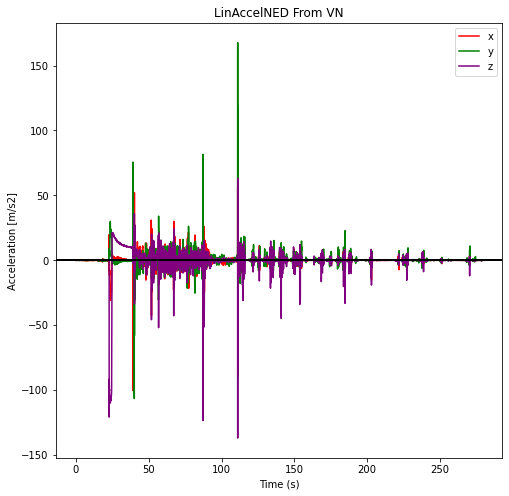

In [8]:
fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata2, ax_vn2, color='red', label='x')
l3 = ax.plot(tdata2, ay_vn2, color='green', label='y')
l4 = ax.plot(tdata2, az_vn2, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [m/s2]")
ax.legend()
plt.show()

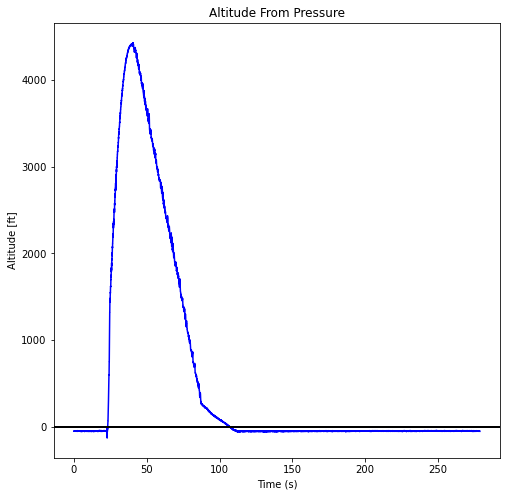

In [9]:
all_pres2 = df['Pres'].values[start2:end2]

def nasa_pres(P, P0=101.29, T0=288.08):
    T = T0*((P / P0)**(1 / 5.256)) - 273.1
    h = (T-15.04)/(-0.00649)
    return h

altitude_NASA_pres2 = v_NASA_pres(all_pres2, P0=99.035, T0=288.1)*ft #+ 70

fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l1 = ax.plot(tdata2, altitude_NASA_pres2, color='blue', label='Pressure Derived')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Altitude From Pressure")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude [ft]")
#ax.legend()
plt.show()

In [10]:
trunc_df2 = pd.DataFrame(zip(tdata2, all_pres2, ax_vn2, ay_vn2, az_vn2, roll_vn2, pitch_vn2, yaw_vn2), columns=fields)
trunc_df2.to_csv("Trunc_NASA_S2.csv", columns=fields)